In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import pandas as pd

Generate and load random real data with multiple columns

In [2]:
num_samples = 1000
num_columns = 3  # Adjust this to the number of columns in your data
real_data = np.random.normal(0, 1, (num_samples, num_columns))

# Save a copy of the real data to a CSV file
real_df = pd.DataFrame(real_data, columns=[f'Real Data {i+1}' for i in range(num_columns)])
real_df.to_csv('real_data.csv', index=False)

#load auto-generated real data
real_df

,Real Data 1,Real Data 2,Real Data 3
0,0.340630,-0.706720,-0.345286
1,0.711138,-1.291437,0.263119
2,0.111883,-0.739375,-1.006415
3,-1.470206,-0.649908,-1.474693
4,-0.081056,1.010354,0.617907
...,...,...,...
995,0.509607,0.624726,0.372473
996,-0.641658,-0.072609,1.209611
997,-1.280215,-0.371561,1.040287
998,0.034405,-0.678140,1.251894


Generator

In [3]:
generator = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_columns,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_columns)  # Output dimension will matches the number of columns
])

Discriminator

In [4]:
discriminator = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_columns,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


Compile the discriminator

In [5]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

GAN

In [6]:
discriminator.trainable = False
gan_input = keras.Input(shape=(num_columns,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


Loop training, train the generator and print progress

In [9]:
epochs = 1000  # canbe use larger for accuracy
batch_size = 32

for epoch in range(epochs):
    # Train  discriminator
    real_samples = real_data[np.random.randint(0, num_samples, batch_size)]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, num_columns)))
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, labels_real)
    d_loss_fake = discriminator.train_on_batch(fake_samples, labels_fake)

    gan_input = np.random.normal(0, 1, (batch_size, num_columns))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(gan_input, labels_gan)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")



1/1 [==============================] - 0s 25ms/step
Epoch 0/1000, D Loss Real: 0.004016845487058163, D Loss Fake: 0.004447859711945057, G Loss: 7.229942321777344
1/1 [==============================] - 0s 19ms/step
Epoch 100/1000, D Loss Real: 0.9186769723892212, D Loss Fake: 0.3205999732017517, G Loss: 3.1825945377349854
1/1 [==============================] - 0s 20ms/step
Epoch 200/1000, D Loss Real: 0.6478698253631592, D Loss Fake: 0.7427064180374146, G Loss: 0.7935664653778076
1/1 [==============================] - 0s 19ms/step
Epoch 300/1000, D Loss Real: 0.7712243795394897, D Loss Fake: 0.6599268913269043, G Loss: 0.7311844825744629
1/1 [==============================] - 0s 20ms/step
Epoch 400/1000, D Loss Real: 0.7184700965881348, D Loss Fake: 0.6511640548706055, G Loss: 0.8072457313537598
1/1 [==============================] - 0s 20ms/step
Epoch 500/1000, D Loss Real: 0.7675701379776001, D Loss Fake: 0.6642453670501709, G Loss: 0.7284486293792725
1/1 [============================

Generate synthetic data with multiple columns

In [10]:
synthetic_data = generator.predict(np.random.normal(0, 1, (num_samples, num_columns)))

32/32 [==============================] - 0s 1ms/step


Calculate the Mean Absolute Error (MAE) for each column



In [11]:
mae_per_column = np.mean(np.abs(real_data - synthetic_data), axis=0)


for i, mae in enumerate(mae_per_column):
    print(f"MAE/Mean absolute error for Real Data Column {i+1}: {mae}")

MAE/Mean absolute error for Real Data Column 1: 1.1338101742886824
MAE/Mean absolute error for Real Data Column 2: 1.1798053522506102
MAE/Mean absolute error for Real Data Column 3: 1.0818632346551442


Generated Synthetic data in CSV file

In [12]:
synthetic_df = pd.DataFrame(synthetic_data, columns=[f'Synthetic Data {i+1}' for i in range(num_columns)])
synthetic_df.to_csv('synthetic_sales_data.csv', index=False)
synthetic_df

,Synthetic Data 1,Synthetic Data 2,Synthetic Data 3
0,-0.557485,-0.503933,0.371272
1,0.133233,1.042494,-0.643189
2,0.850206,0.570243,0.094971
3,0.913453,-0.661571,-0.208271
4,0.371624,-2.308487,-1.843834
...,...,...,...
995,-0.114325,-1.250179,1.342317
996,-0.684783,0.097593,1.883458
997,1.542729,-0.318730,-0.234838
998,0.024566,2.359483,-0.303630


Visualization and save histogram in png file

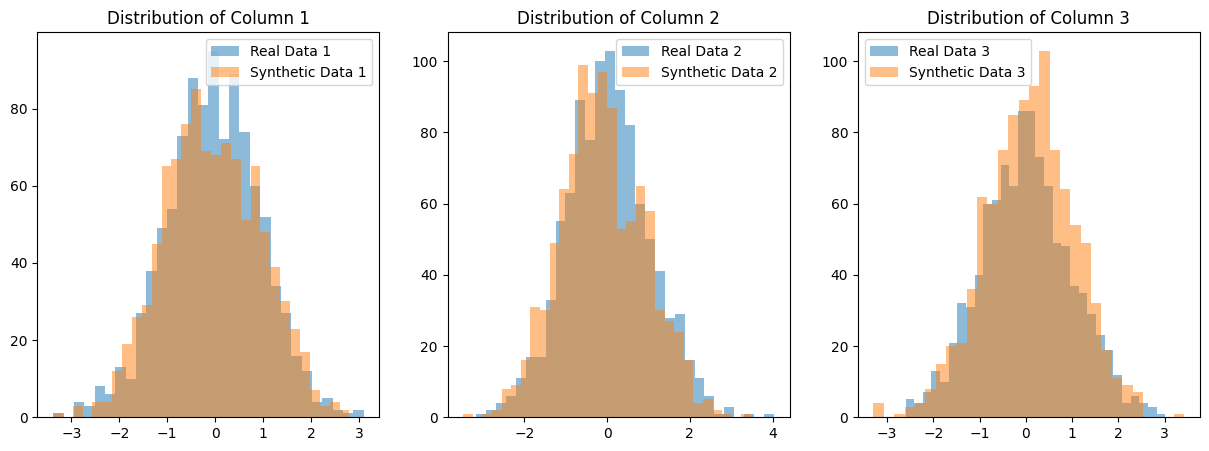

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 5))

for i in range(num_columns):
    ax = axes[i]
    ax.hist(real_data[:, i], bins=30, alpha=0.5, label=f'Real Data {i+1}')
    ax.hist(synthetic_data[:, i], bins=30, alpha=0.5, label=f'Synthetic Data {i+1}')
    ax.legend()
    ax.set_title(f'Distribution of Column {i+1}')


plt.savefig('combined_histogram_sales_plot.png')


plt.show()